In [194]:
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols
from pandas_datareader import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import datetime
import math

symbols = get_nasdaq_symbols()
print(symbols.ix['AMZN'])

Nasdaq Traded                                  True
Security Name       Amazon.com, Inc. - Common Stock
Listing Exchange                                  Q
Market Category                                   Q
ETF                                           False
Round Lot Size                                  100
Test Issue                                    False
Financial Status                                  N
CQS Symbol                                      NaN
NASDAQ Symbol                                  AMZN
NextShares                                    False
Name: AMZN, dtype: object


In [127]:
# #1 
list_of_traded_corps = symbols.loc[:, ['NASDAQ Symbol', 'Security Name', 'Listing Exchange']]

# I have got this list from this link - http://www.nasdaqtrader.com/trader.aspx?id=symboldirdefs
listing_exchange = { 
    'A': 'NYSE MKT',
    'N': 'New York Stock Exchange (NYSE)',
    'P': 'NYSE ARCA',
    'Q': 'Q - NASDAQ?', # not sure about this one
    'V': 'Investors\' Exchange, LLC (IEXG)',
    'Z': 'BATS Global Markets (BATS)'
}

list_of_traded_corps['Listing Exchange'] = list_of_traded_corps['Listing Exchange'].apply(lambda c: listing_exchange[c])
list_of_traded_corps.head()

,NASDAQ Symbol,Security Name,Listing Exchange
Symbol,,,
A,A,"Agilent Technologies, Inc. Common Stock",New York Stock Exchange (NYSE)
AA,AA,Alcoa Corporation Common Stock,New York Stock Exchange (NYSE)
AAAP,AAAP,Advanced Accelerator Applications S.A. - Ameri...,Q - NASDAQ?
AABA,AABA,Altaba Inc. - Common Stock,Q - NASDAQ?
AAC,AAC,"AAC Holdings, Inc. Common Stock",New York Stock Exchange (NYSE)


In [137]:
# #2

# tickers = list_of_traded_corps.loc[:, 'NASDAQ Symbol'].values # this takes a long time, so i decided to use a few tickers
tickers = ['AAPL', 'AMZN', 'GOOGL', 'IBM']
data_source = 'yahoo'

date_2016 = (datetime.datetime(2016, 1, 1), datetime.datetime(2016, 12, 31))
all_weekdays_2016 = pd.date_range(start = date_2016[0], end = date_2016[1], freq='B')

data_2016 = data.DataReader(tickers, data_source, date_2016[0], date_2016[1])
close_prices_2016 = data_2016.ix['Adj Close'].reindex(all_weekdays_2016).dropna()

close_prices_2016.head()

,AAPL,AMZN,GOOGL,IBM
2016-01-04,101.790649,636.989990,759.440002,127.330009
2016-01-05,99.239845,633.789978,761.530029,127.236343
2016-01-06,97.297760,632.650024,759.330017,126.599449
2016-01-07,93.191338,607.940002,741.000000,124.435936
2016-01-08,93.684120,607.049988,730.909973,123.283920


In [84]:
# print(list_of_traded_corps[list_of_traded_corps['NASDAQ Symbol'].isin(tickers)])

In [91]:
# Relative returns
returns = close_prices_2016.pct_change(1)
returns.head()

,AAPL,AMZN,GOOGL,IBM
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,-0.025059,-0.005024,0.002752,-0.000736
2016-01-06,-0.019570,-0.001799,-0.002889,-0.005006
2016-01-07,-0.042205,-0.039058,-0.024140,-0.017089
2016-01-08,0.005288,-0.001464,-0.013617,-0.009258


In [119]:
log_returns = np.log(close_prices_2016).diff()
log_returns.head()

,AAPL,AMZN,GOOGL,IBM
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,-0.025379,-0.005036,0.002748,-0.000736
2016-01-06,-0.019764,-0.001800,-0.002893,-0.005018
2016-01-07,-0.043121,-0.039841,-0.024436,-0.017237
2016-01-08,0.005274,-0.001465,-0.013710,-0.009301


In [100]:
# #3
desc = close_prices_2016.describe()
desc.loc['min-max diff'] = desc.loc['max'] - desc.loc['min']

desc

# so here we can see that Amazon would be the most profitable option, and the worst one is Apple

,AAPL,AMZN,GOOGL,IBM
count,252.000000,252.000000,252.000000,252.000000
mean,102.324489,699.523135,763.213214,143.980017
std,7.934424,92.362312,37.402048,12.581173
min,88.295753,482.070007,681.140015,111.505096
25%,94.631574,606.929993,730.487488,139.166096
50%,102.921017,727.875000,761.750000,146.068947
75%,108.938551,767.882492,799.865021,153.450955
max,116.200294,844.359985,835.739990,163.839554
min-max diff,27.904541,362.289978,154.599975,52.334458


In [196]:
aapl_amzn_dict = { 'AAPL': log_returns.AAPL, 'AMZN': log_returns.AMZN }
AAPL_AMZN_log_returns = pd.DataFrame.from_dict(aapl_amzn_dict)

# Let's apply the above:
fig = plt.figure(figsize=[16,9])

ax = fig.add_subplot(2,1,2)

for c in AAPL_AMZN_log_returns:
    ax.plot(AAPL_AMZN_log_returns.index, 100*(np.exp(AAPL_AMZN_log_returns[c].cumsum()) - 1), label=str(c))

ax.set_ylabel('Total relative returns (%)')
ax.legend(loc='best')
ax.grid()

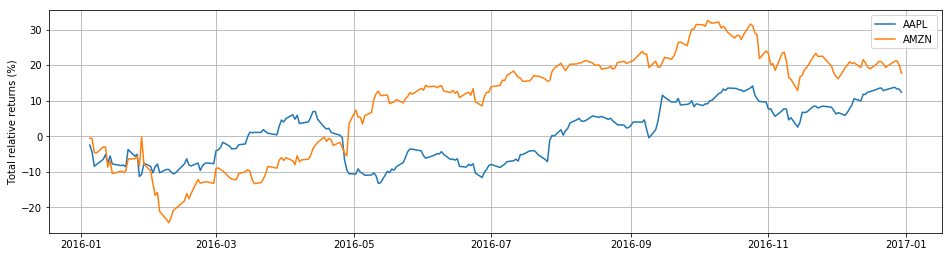

In [197]:
plt.show()

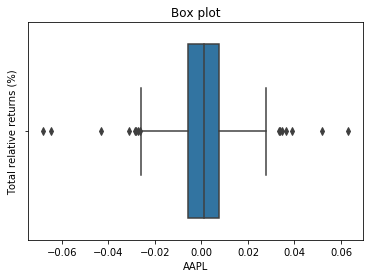

In [207]:
# boxplot  (Box and Whisker plot)
box = sbn.boxplot(x='AAPL', data=AAPL_AMZN_log_returns)
box.set_title('Box plot for Apple')
box.set_ylabel('Total relative returns (%)')

plt.show()

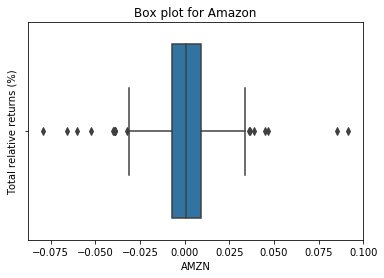

In [209]:
# boxplot  (Box and Whisker plot)
box = sbn.boxplot(x='AMZN', data=AAPL_AMZN_log_returns)
box.set_title('Box plot for Amazon')
box.set_ylabel('Total relative returns (%)')

plt.show()

In [188]:
# #4 $10k

# 1. Apple - AAPL
AAPL_p_01_01_2016 = 5000
number_of_shares_start = math.floor(AAPL_p_01_01_2016 / close_prices_2016.AAPL[0])
AAPL_p_12_31_2016 = number_of_shares_start * close_prices_2016.AAPL[-1]

print "1. Relative return for Apple = %.2f%%" % ( (AAPL_p_12_31_2016 - AAPL_p_01_01_2016) / AAPL_p_01_01_2016 * 100 )

# 2. Amazon - AMZN
AMZN_p_01_01_2016 = 5000
number_of_shares_start = math.floor(AMZN_p_01_01_2016 / close_prices_2016.AMZN[0])
AMZN_p_12_31_2016 = number_of_shares_start * close_prices_2016.AMZN[-1]

print "2. Relative return for Amazon = %.2f%%" % ( (AMZN_p_12_31_2016 - AMZN_p_01_01_2016) / AMZN_p_01_01_2016 * 100 )


1. Relative return for Apple = 12.11%
2. Relative return for Amazon = 4.98%


In [208]:
# #5 40% - AAPL, 30% - AMZN, 30% - GOOGL

# 1. Apple - AAPL
AAPL_p_01_01_2016 = 4000
number_of_shares_start = math.floor(AAPL_p_01_01_2016 / close_prices_2016.AAPL[0])
AAPL_p_12_31_2016 = number_of_shares_start * close_prices_2016.AAPL[-1]
relative_return = (AAPL_p_12_31_2016 - AAPL_p_01_01_2016) / AAPL_p_01_01_2016 * 100

print "1. Relative return for Apple = %.2f%%" % relative_return

# 2. Amazon - AMZN
AMZN_p_01_01_2016 = 3000
number_of_shares_start = math.floor(AMZN_p_01_01_2016 / close_prices_2016.AMZN[0])
AMZN_p_12_31_2016 = number_of_shares_start * close_prices_2016.AMZN[-1]
relative_return = (AMZN_p_12_31_2016 - AMZN_p_01_01_2016) / AMZN_p_01_01_2016 * 100

print "2. Relative return for Amazon = %.2f%%" % relative_return

# 3. Google - GOOGL
GOOGL_p_01_01_2016 = 3000
number_of_shares_start = math.floor(GOOGL_p_01_01_2016 / close_prices_2016.GOOGL[0])
GOOGL_p_12_31_2016 = number_of_shares_start * close_prices_2016.GOOGL[-1]
relative_return = (GOOGL_p_12_31_2016 - GOOGL_p_01_01_2016) / GOOGL_p_01_01_2016 * 100

print "3. Relative return for Google = %.2f%%" % relative_return

total_income = AAPL_p_12_31_2016 + AMZN_p_12_31_2016 + GOOGL_p_12_31_2016
print "Our capital on the beginning of 2016 - $10.000. Our income for the end of 2016 = %.2f" % total_income

1. Relative return for Apple = 11.54%
2. Relative return for Amazon = -0.02%
3. Relative return for Google = -20.75%
Our capital on the beginning of 2016 - $10.000. Our income for the end of 2016 = 9838.30
